In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model, add_sentiment_features_from_articles
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
np.random.seed(120)
random.seed(120)

In [5]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [6]:
X, y = prepare_market_data_for_model("btc_merged.csv", base_path, horizon=12*12)

In [7]:

texts = pd.read_csv("/content/drive/My Drive/magisterka/data/results/articles_labeled.csv")

In [8]:
X = add_sentiment_features_from_articles(X, texts, windows_hours=(2, 6, 12, 24))

In [9]:
X

price_over_ema4h  price_over_ema2h  volatility_4h  \
timestamp                                                                      
2025-04-12 00:10:00+00:00         -0.001970         -0.001255       0.000909   
2025-04-12 00:15:00+00:00         -0.000955         -0.000257       0.000922   
2025-04-12 00:20:00+00:00         -0.001689         -0.000979       0.000927   
2025-04-12 00:25:00+00:00         -0.002482         -0.001727       0.000914   
2025-04-12 00:30:00+00:00         -0.002018         -0.001241       0.000910   
...                                     ...               ...            ...   
2025-06-06 11:35:00+00:00          0.002404          0.000878       0.000510   
2025-06-06 11:40:00+00:00          0.001807          0.000330       0.000473   
2025-06-06 11:45:00+00:00          0.002057          0.000613       0.000474   
2025-06-06 11:50:00+00:00          0.002950          0.001500       0.000491   
2025-06-06 11:55:00+00:00          0.003464          0.001988       0.000496   

                           volatility_wh  volume_z       s_t  log_return_t-1  \
timestamp                                                                      
2025-04-12 00:10:00+00:00       0.001581 -0.566746  0.001581        0.000976   
2025-04-12 00:15:00+00:00       0.001576 -0.722191  0.001576       -0.000807   
2025-04-12 00:20:00+00:00       0.001575 -0.798340  0.001575       -0.000900   
2025-04-12 00:25:00+00:00       0.001575 -0.606952  0.001575        0.000379   
2025-04-12 00:30:00+00:00       0.001575 -0.739591  0.001575        0.001151   
...                                  ...       ...       ...             ...   
2025-06-06 11:35:00+00:00       0.001178 -0.146593  0.001178       -0.000519   
2025-06-06 11:40:00+00:00       0.001178 -0.507527  0.001178        0.000337   
2025-06-06 11:45:00+00:00       0.001179 -0.326600  0.001179        0.001017   
2025-06-06 11:50:00+00:00       0.001180 -0.616530  0.001180        0.000660   
2025-06-06 11:55:00+00:00       0.001181 -0.327296  0.001181       -0.000215   

                           news_any  sentiment_mean_2h  news_count_2h  \
timestamp                                                               
2025-04-12 00:10:00+00:00       0.0                0.0            0.0   
2025-04-12 00:15:00+00:00       0.0                0.0            0.0   
2025-04-12 00:20:00+00:00       0.0                0.0            0.0   
2025-04-12 00:25:00+00:00       0.0                0.0            0.0   
2025-04-12 00:30:00+00:00       0.0                0.0            0.0   
...                             ...                ...            ...   
2025-06-06 11:35:00+00:00       0.0                0.0            0.0   
2025-06-06 11:40:00+00:00       0.0                0.0            0.0   
2025-06-06 11:45:00+00:00       0.0                0.0            0.0   
2025-06-06 11:50:00+00:00       0.0                0.0            0.0   
2025-06-06 11:55:00+00:00       0.0                0.0            0.0   

                           has_news_2h  sentiment_mean_6h  news_count_6h  \
timestamp                                                                  
2025-04-12 00:10:00+00:00          0.0                0.0            0.0   
2025-04-12 00:15:00+00:00          0.0                0.0            0.0   
2025-04-12 00:20:00+00:00          0.0                0.0            0.0   
2025-04-12 00:25:00+00:00          0.0                0.0            0.0   
2025-04-12 00:30:00+00:00          0.0                0.0            0.0   
...                                ...                ...            ...   
2025-06-06 11:35:00+00:00          0.0                0.0            0.0   
2025-06-06 11:40:00+00:00          0.0                0.0            0.0   
2025-06-06 11:45:00+00:00          0.0                0.0            0.0   
2025-06-06 11:50:00+00:00          0.0                0.0            0.0   
2025-06-06 11:55:00+00:00          0.0                0.0            0.0   

      

In [10]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.7684 - val_loss: 0.9139 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6203 - val_loss: 0.8577 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5665 - val_loss: 0.8604 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.5785 - val_loss: 0.8612 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.5628 - val_loss: 0.8655 - learning_rate: 5.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.5604 - val_loss: 0.8702 - learning_rate: 5.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5483 - val_loss: 0.8721 - learning_rate: 2.5000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5497 - val_loss: 0.8736 - learning_rate: 2.5000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5451 - val_loss: 0.8739 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


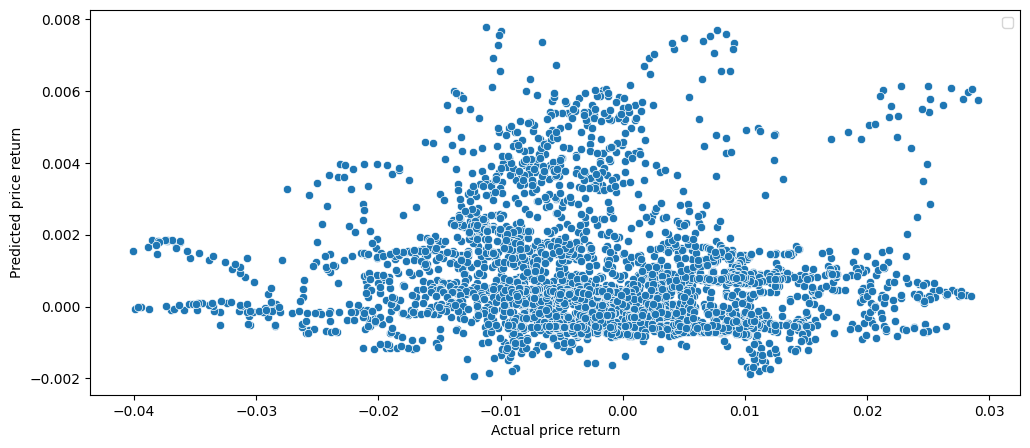

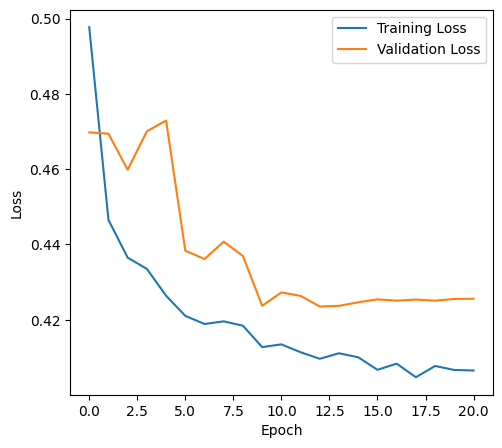

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00016691783093847334
mean CV MAE: 0.009754691272974014
mean CV DA: 0.4825918762088975
mean CV SR: 0.0729009751265977
mean CV R^2: -0.13930211067199708
mean CV Pearson correlation: -0.01675497554242611


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


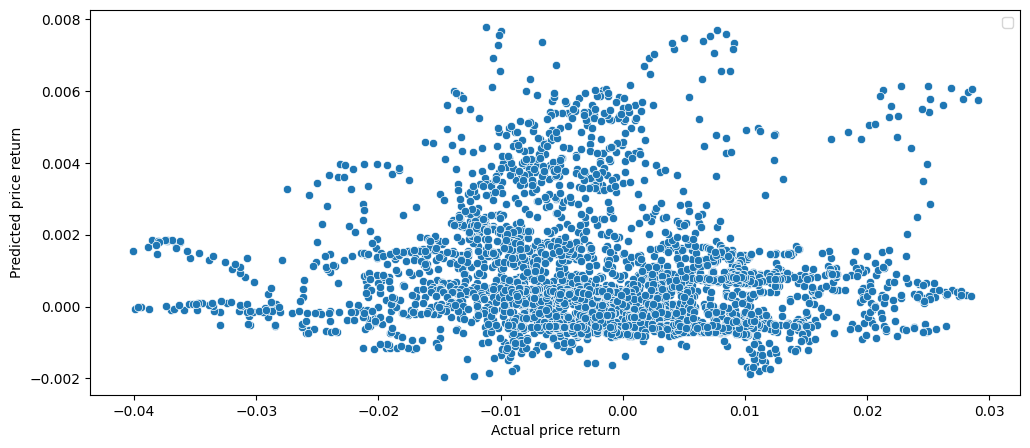

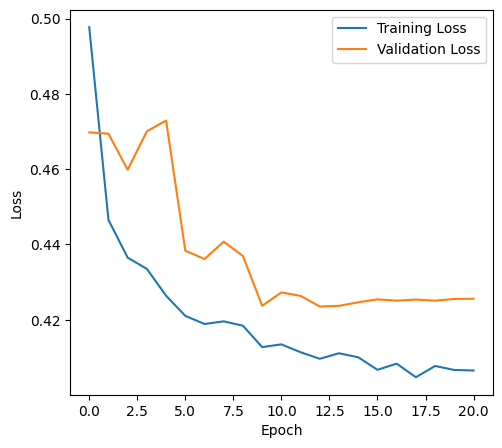

successfully saved training's output to lstm_btc_scores_final_1_1.json


In [11]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_btc_scores_final_1_1.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7456 - val_loss: 0.8417 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6441 - val_loss: 0.8043 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5399 - val_loss: 0.8200 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5491 - val_loss: 0.8443 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5090 - val_loss: 0.8531 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5015 - val_loss: 0.8601 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4827 - val_loss: 0.8654 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4886 - val_loss: 0.8657 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4636 - val_loss: 0.8663 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


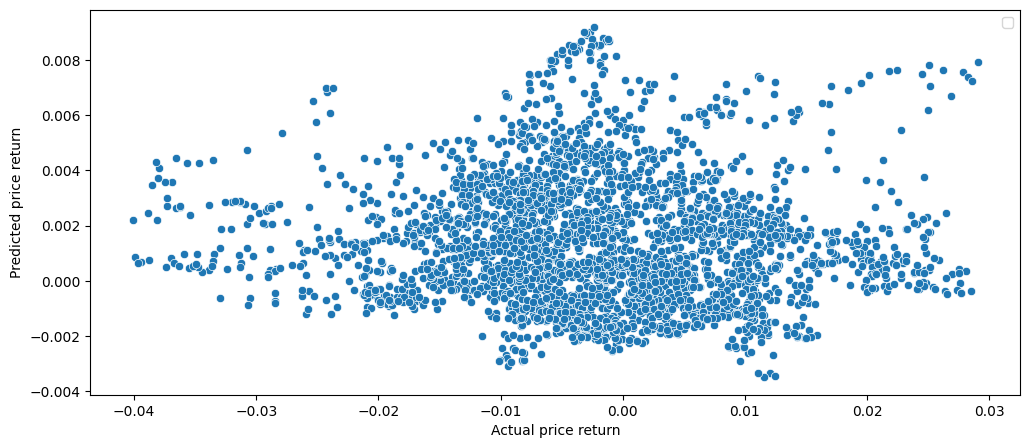

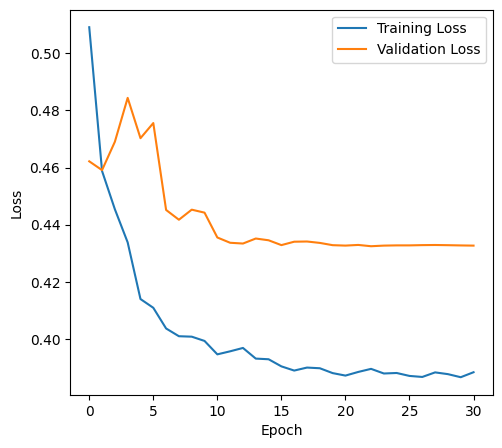

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0001650770427659154
mean CV MAE: 0.009524643421173096
mean CV DA: 0.531431334622824
mean CV SR: 0.10143221609002921
mean CV R^2: -0.12906147241592408
mean CV Pearson correlation: 0.07902242988348007


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


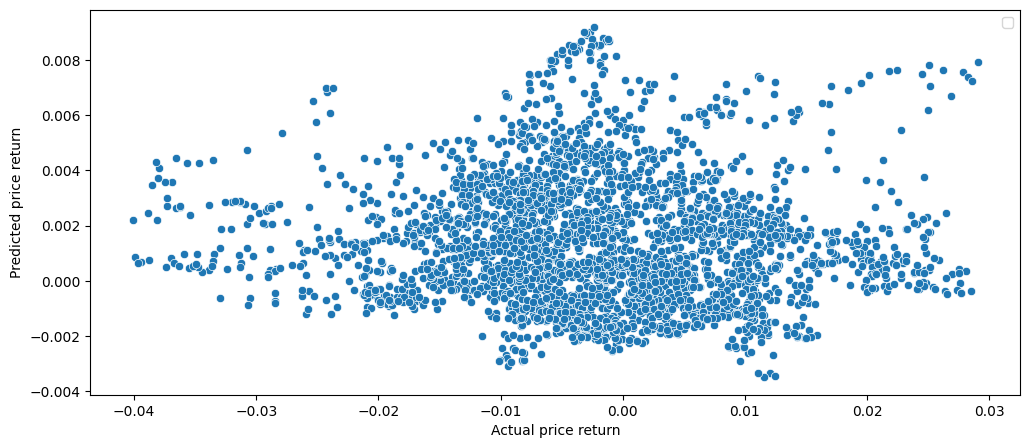

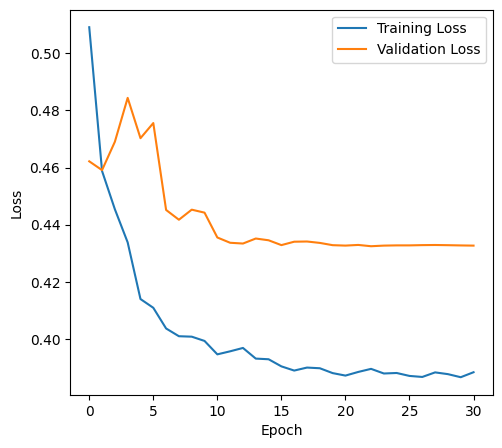

successfully saved training's output to lstm_btc_scores_final_2_1.json


In [12]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_btc_scores_final_2_1.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7768 - val_loss: 0.9277 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7726 - val_loss: 0.9947 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5717 - val_loss: 1.1568 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5948 - val_loss: 0.9066 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4368 - val_loss: 1.0053 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4439 - val_loss: 1.0402 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3784 - val_loss: 1.0189 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3683 - val_loss: 1.0448 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3492 - val_loss: 1.0444 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


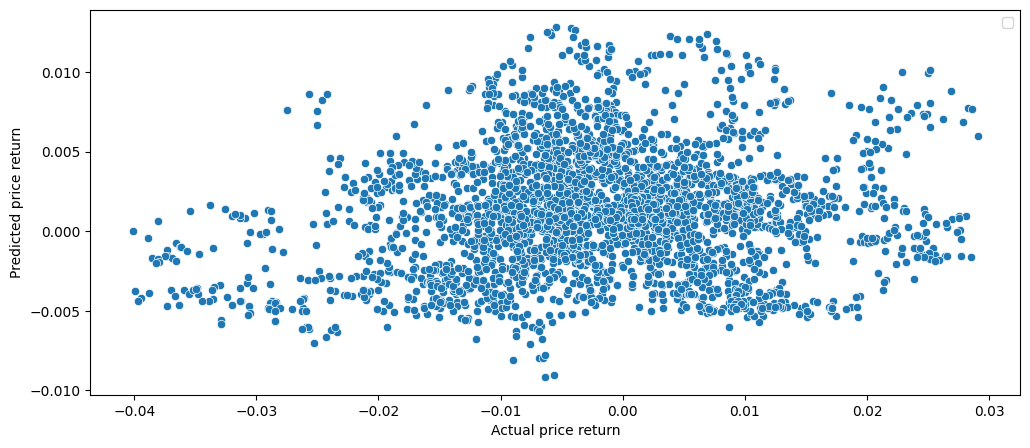

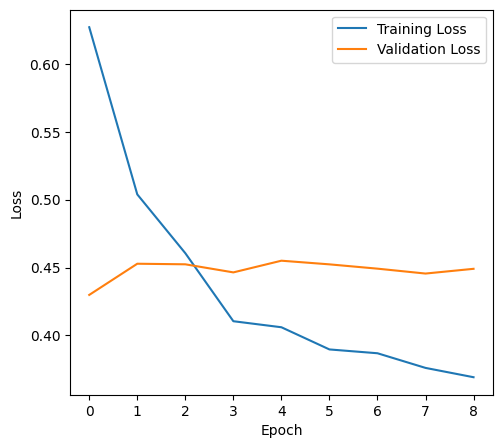

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0001765166234690696
mean CV MAE: 0.010002225637435913
mean CV DA: 0.5055125725338491
mean CV SR: 0.04662485164061565
mean CV R^2: -0.2293391227722168
mean CV Pearson correlation: -0.006426313426345587


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


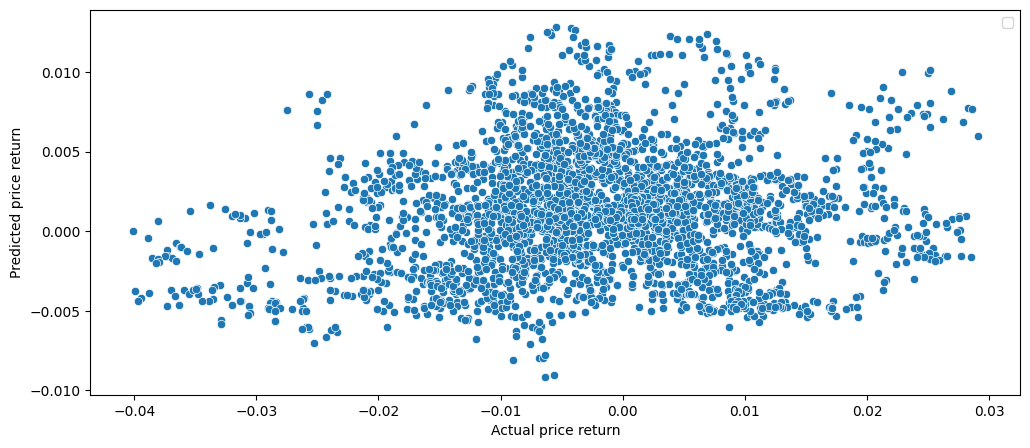

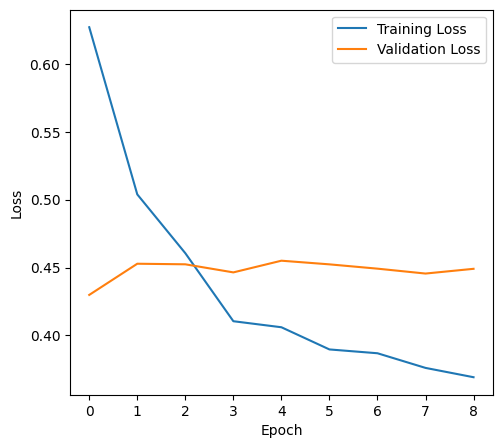

successfully saved training's output to lstm_btc_scores_final_3_1.json


In [13]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_btc_scores_final_3_1.json", dropout=0.3, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.8758 - val_loss: 0.8900 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6623 - val_loss: 0.8359 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5231 - val_loss: 0.8854 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4995 - val_loss: 0.9254 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3924 - val_loss: 0.9787 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3463 - val_loss: 0.9663 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3319 - val_loss: 1.0050 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3034 - val_loss: 1.0168 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2907 - val_loss: 1.0070 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


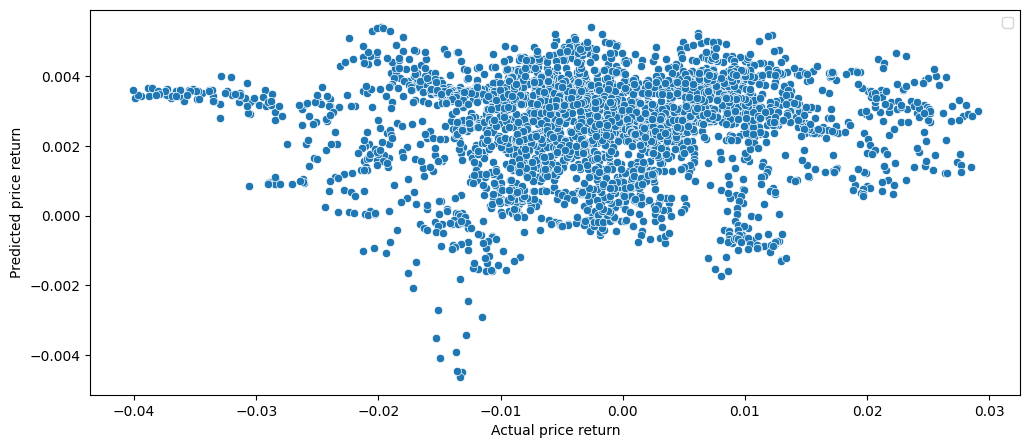

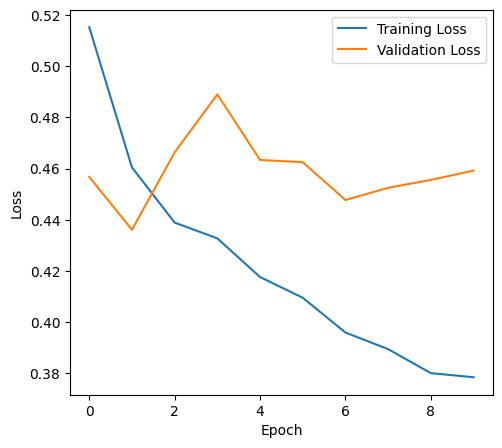

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00016581742966081947
mean CV MAE: 0.0097577515989542
mean CV DA: 0.5032882011605416
mean CV SR: 0.06772648416770741
mean CV R^2: -0.15681793689727783
mean CV Pearson correlation: 0.03775492683053017


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


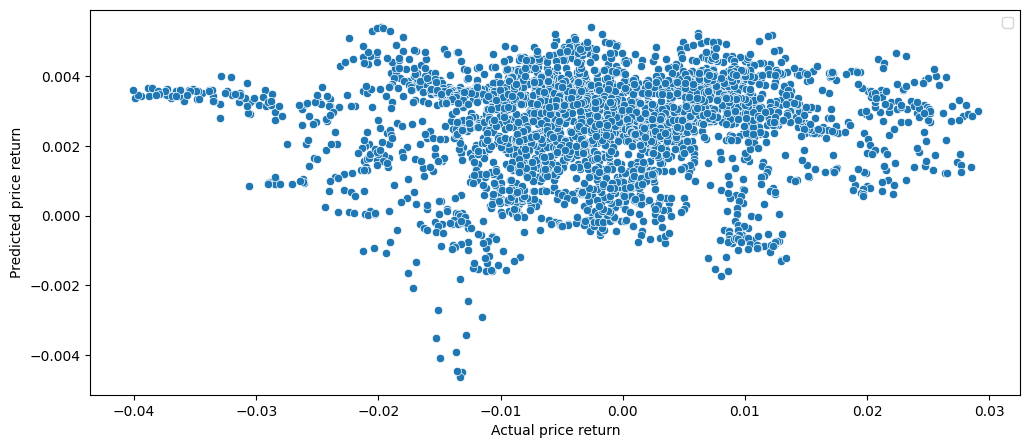

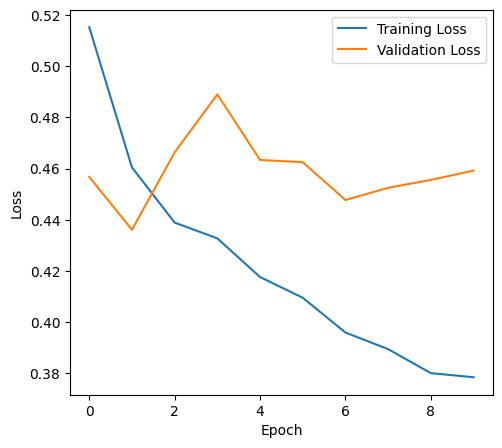

successfully saved training's output to lstm_btc_scores_final_4_1.json


In [14]:
lstm_4_scores, lstm_4_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_btc_scores_final_4_1.json", dropout=0.2, num_neurons=24, num_layers=2, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.9446 - val_loss: 0.9400 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6273 - val_loss: 0.9130 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5125 - val_loss: 0.8488 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4505 - val_loss: 1.0182 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5224 - val_loss: 0.9483 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3249 - val_loss: 1.0112 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3377 - val_loss: 0.9945 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2842 - val_loss: 0.9994 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2573 - val_loss: 1.0049 - learning_rate: 5.0000e-04
Ep

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


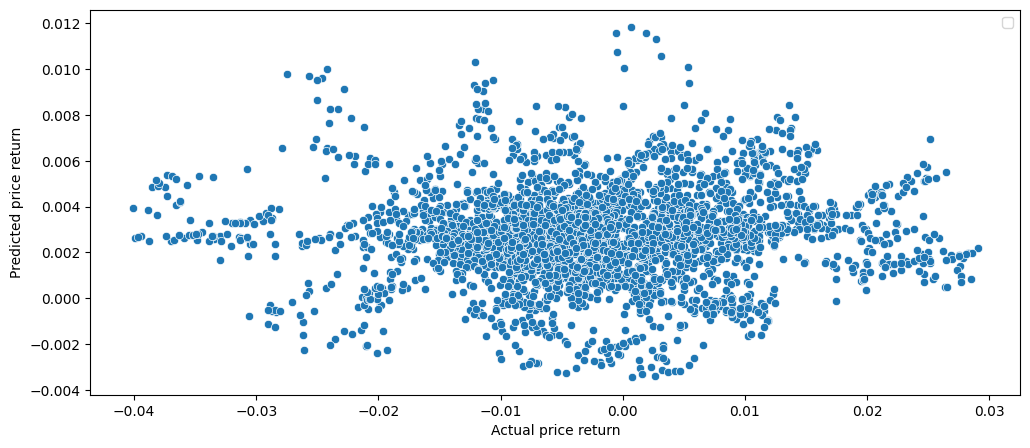

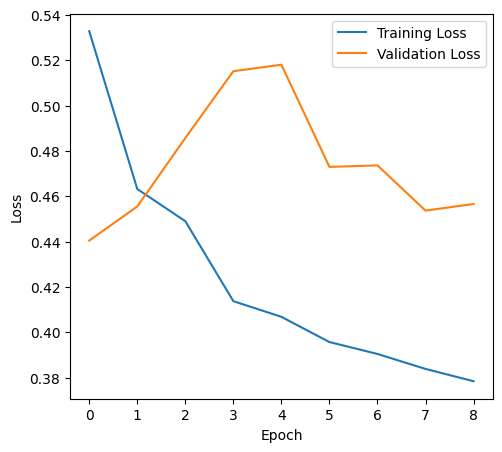

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00016827372019179165
mean CV MAE: 0.009924577549099922
mean CV DA: 0.5024177949709865
mean CV SR: 0.07394453229473459
mean CV R^2: -0.17935819625854493
mean CV Pearson correlation: 0.005163013935089111


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


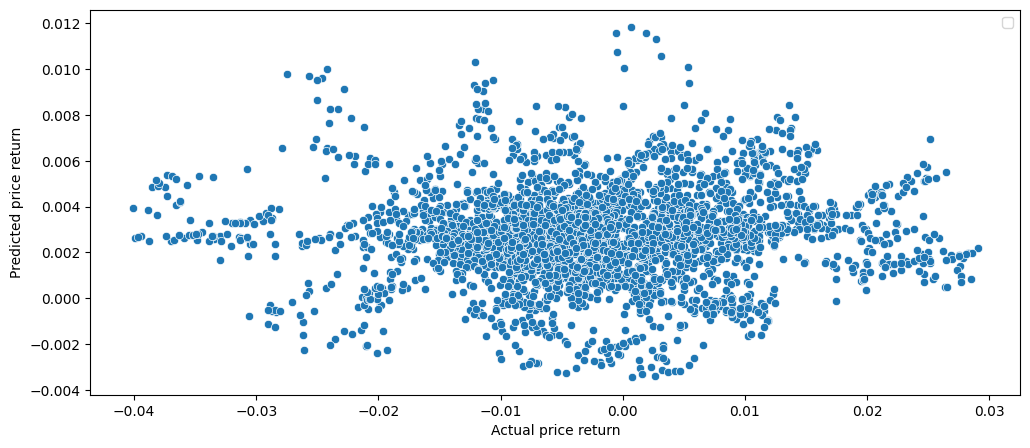

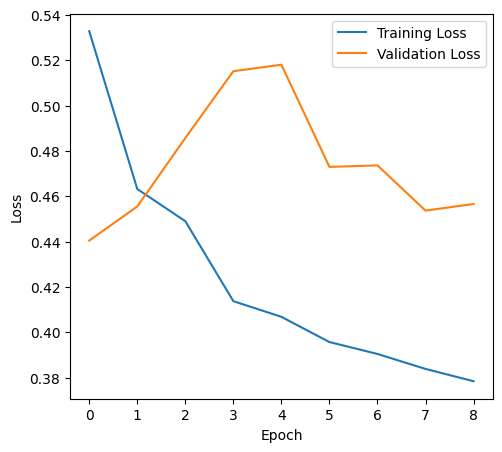

successfully saved training's output to lstm_btc_scores_final_5_1.json


In [15]:
lstm_5_scores, lstm_5_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_btc_scores_final_5_1.json", dropout=0.2, num_neurons=24, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.7205 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6252 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.6248 - val_loss: 0.7708 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.6098 - val_loss: 0.7804 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.6165 - val_loss: 0.7821 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6061 - val_loss: 0.7749 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5998 - val_loss: 0.7739 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6039 - val_loss: 0.7762 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5887 - val_loss: 0.7802 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


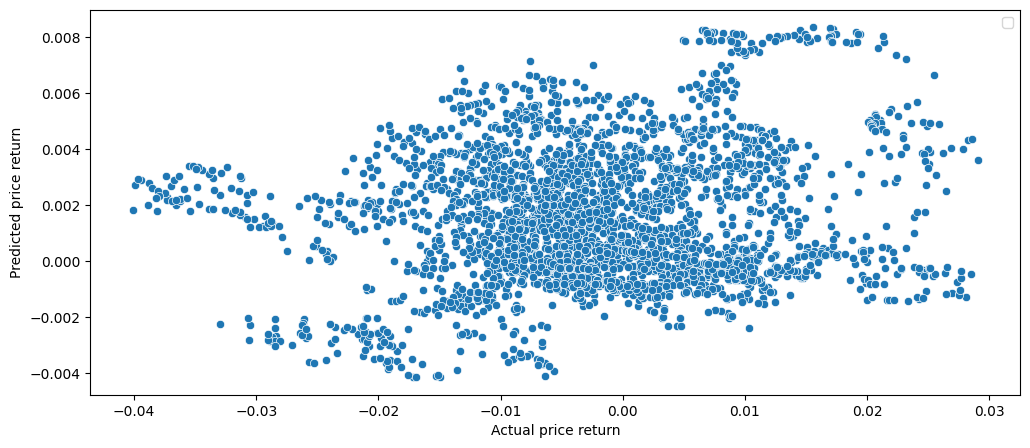

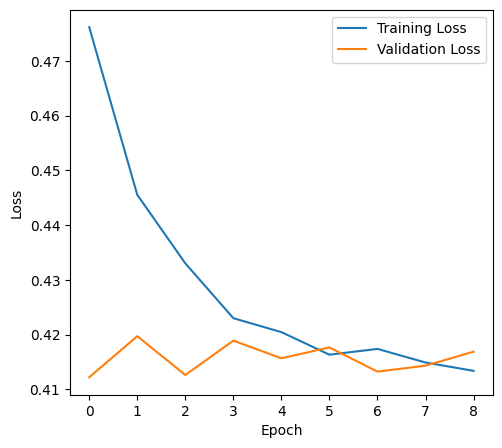

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00016032990242820233
mean CV MAE: 0.009498342871665955
mean CV DA: 0.5574468085106382
mean CV SR: 0.21030634282890265
mean CV R^2: -0.10614025592803955
mean CV Pearson correlation: 0.04673956707119942


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


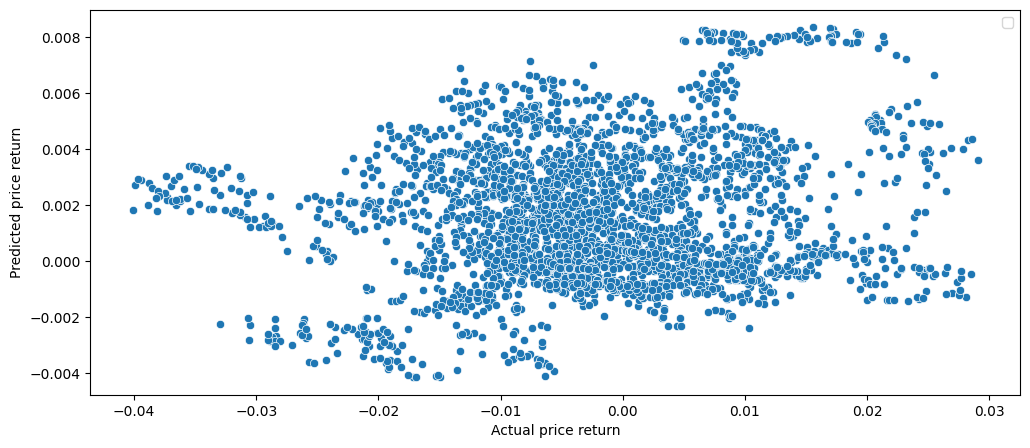

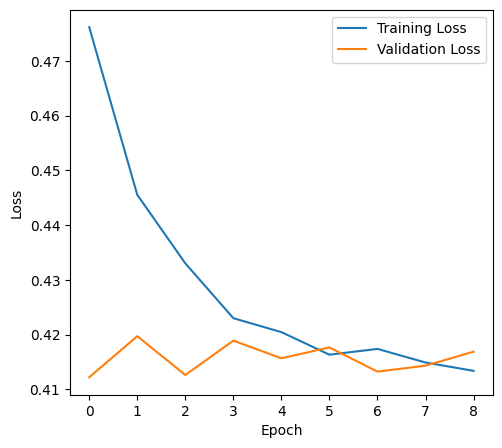

successfully saved training's output to gru_btc_scores_1_1_final.json


In [16]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_btc_scores_1_1_final.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7487 - val_loss: 0.8229 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6339 - val_loss: 0.8147 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6058 - val_loss: 0.8168 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5911 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5601 - val_loss: 0.8238 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5498 - val_loss: 0.8287 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5506 - val_loss: 0.8320 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5627 - val_loss: 0.8320 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5496 - val_loss: 0.8367 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


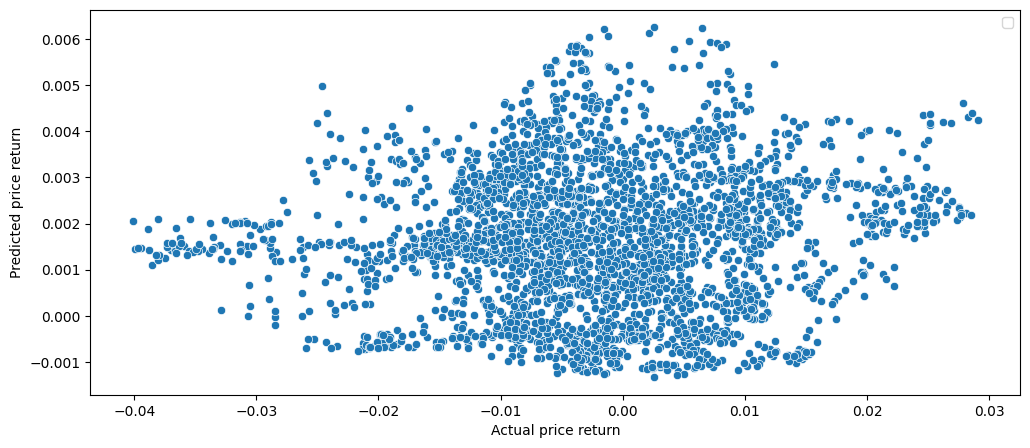

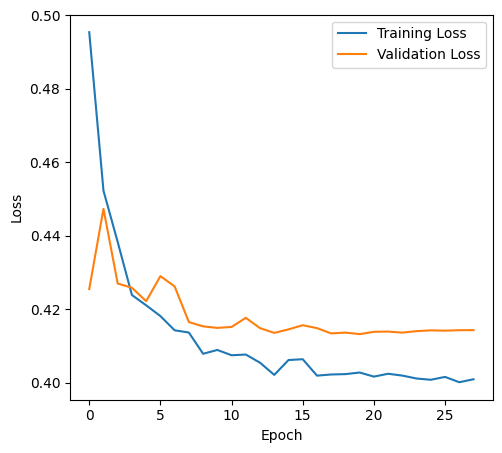

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00016443050117231905
mean CV MAE: 0.009575938805937767
mean CV DA: 0.5143133462282398
mean CV SR: 0.11606218410433815
mean CV R^2: -0.12247422933578492
mean CV Pearson correlation: 0.039315115660429


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


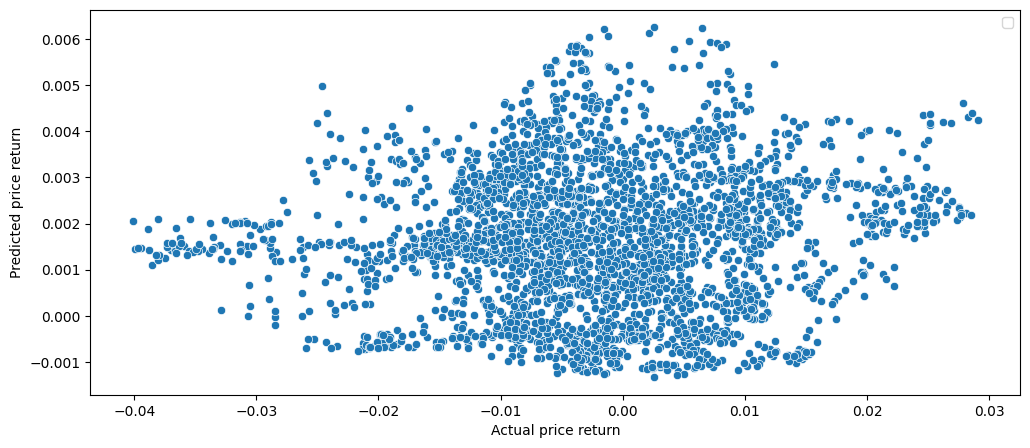

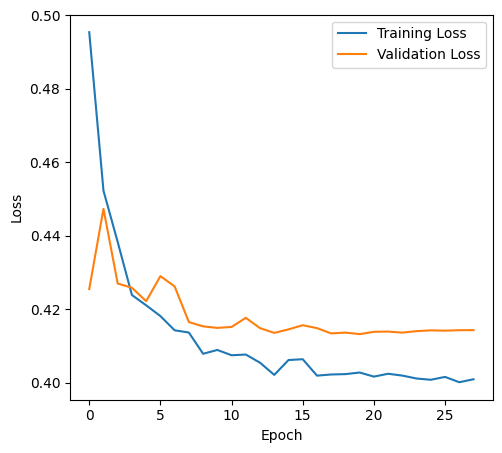

successfully saved training's output to gru_btc_scores_final_2_1.json


In [17]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_btc_scores_final_2_1.json", dropout=0.7, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.8942 - val_loss: 1.0050 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9962 - val_loss: 1.2903 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6645 - val_loss: 1.0153 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5018 - val_loss: 1.1392 - learning_rate: 5.0000e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4505 - val_loss: 0.9515 - learning_rate: 5.0000e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4479 - val_loss: 1.0892 - learning_rate: 5.0000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4166 - val_loss: 1.0520 - learning_rate: 5.0000e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3616 - val_loss: 1.0319 - learning_rate: 2.5000e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3615 - val_loss: 1.0668 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


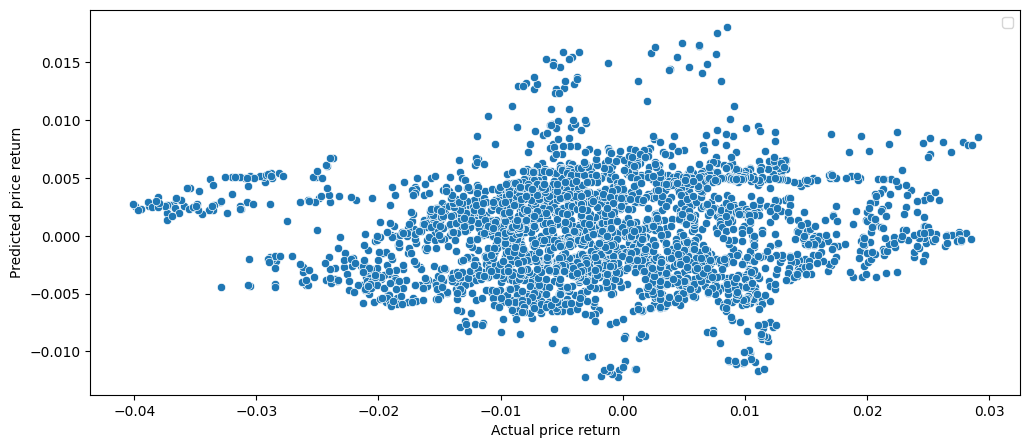

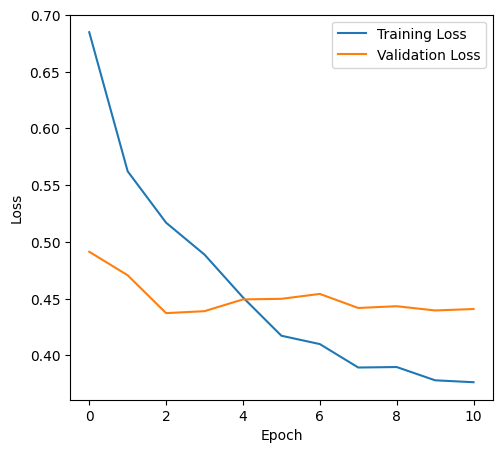

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00016896204033400863
mean CV MAE: 0.00992826372385025
mean CV DA: 0.5229376257545272
mean CV SR: 0.1087667356384265
mean CV R^2: -0.19156944751739502
mean CV Pearson correlation: -0.0015128671657294035


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


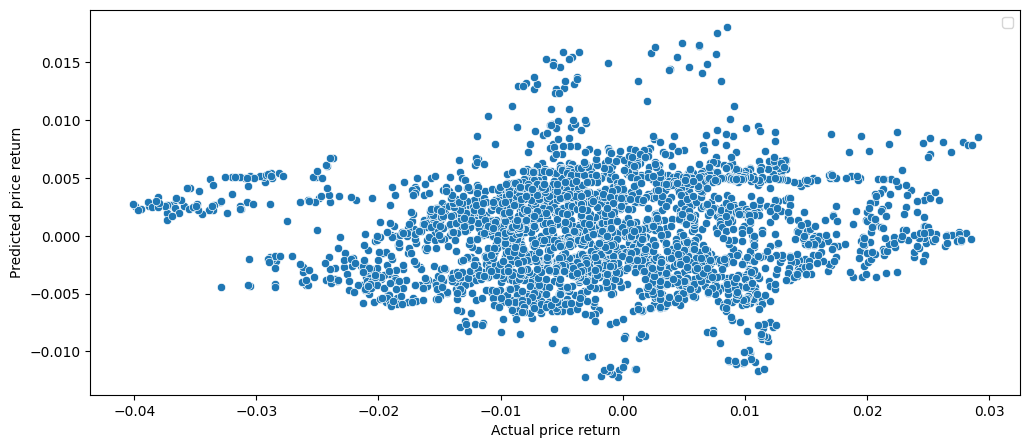

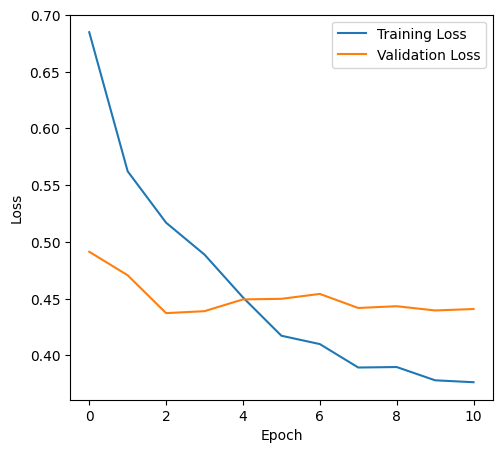

successfully saved training's output to gru_btc_scores_final_3_1.json


In [18]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_btc_scores_final_3_1.json", dropout=0.2, num_neurons=96, num_layers=1, batch_size=64, seq_length=144, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0917 - val_loss: 0.9687 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7454 - val_loss: 0.8157 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6851 - val_loss: 0.8982 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5911 - val_loss: 0.8822 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5645 - val_loss: 0.9469 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5205 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4809 - val_loss: 0.8940 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4833 - val_loss: 0.9029 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4578 - val_loss: 0.9139 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


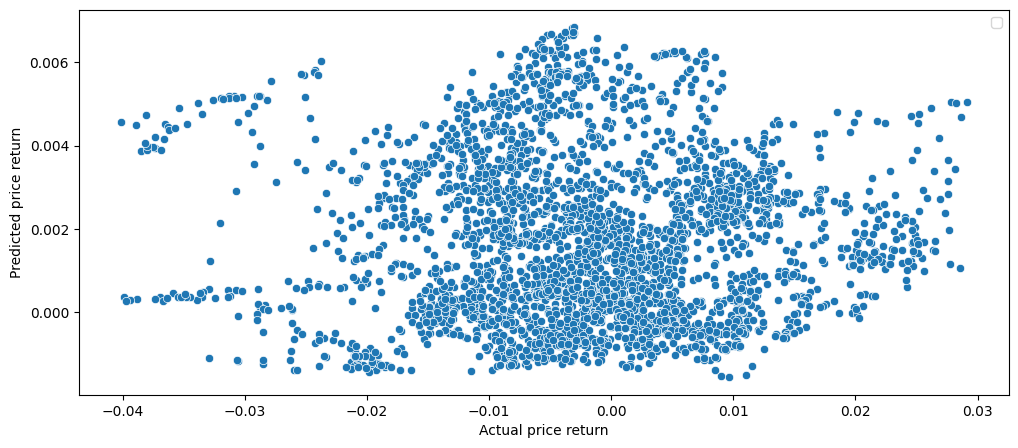

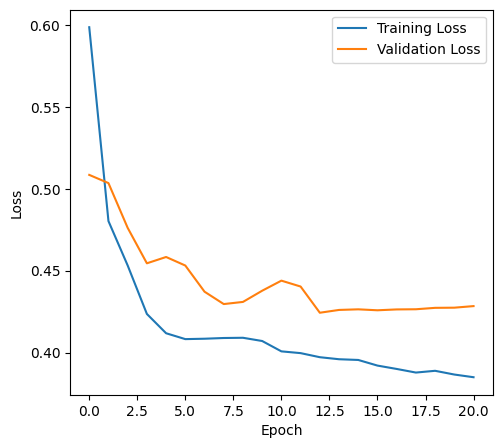

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0001672790094744414
mean CV MAE: 0.009720025584101677
mean CV DA: 0.5218568665377176
mean CV SR: 0.08199700271547941
mean CV R^2: -0.16855767965316773
mean CV Pearson correlation: -0.030750155448913574


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


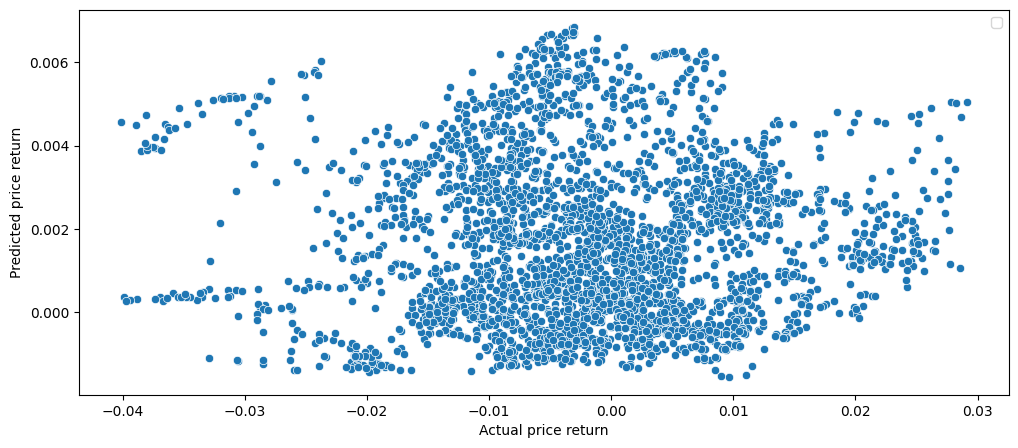

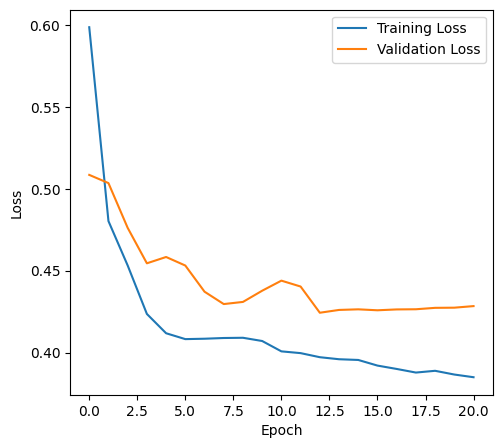

successfully saved training's output to gru_btc_scores_final_4_1.json


In [22]:
gru_4_scores, gru_4_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_btc_scores_final_4_1.json", dropout=0.5, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 1] mse: 0.000276813 | mae: 0.0124156 | da: 0.487 | sr: 0.147


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 2] mse: 8.45855e-05 | mae: 0.0066205 | da: 0.569 | sr: 0.066


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 3] mse: 0.000396057 | mae: 0.0157225 | da: 0.333 | sr: -0.490


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 4] mse: 0.000128864 | mae: 0.00893105 | da: 0.544 | sr: 0.056


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 5] mse: 0.000816312 | mae: 0.0247675 | da: 0.432 | sr: -0.261


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[FINAL TEST] mse: 0.00012831 | mae: 0.00885752 | da: 0.582 | sr: 0.237 | r_squared: 0.003 | corr: 0.202


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


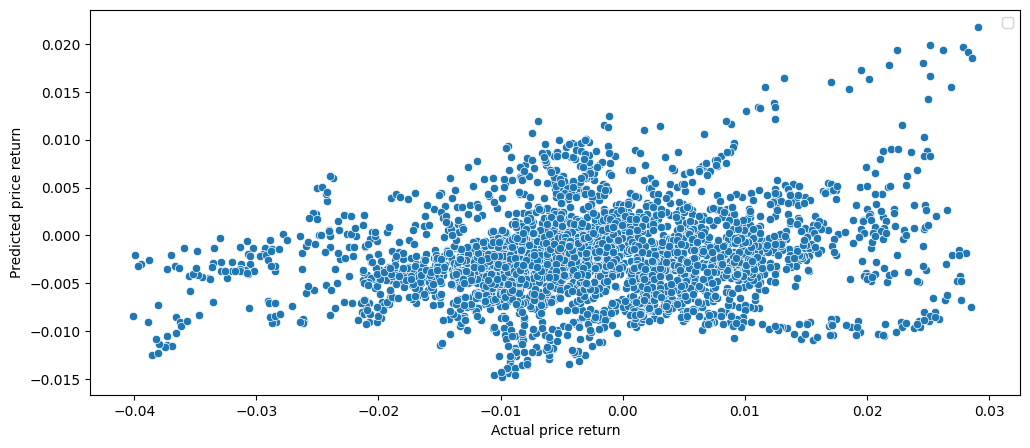

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0003405262141697024
mean CV MAE: 0.013691432820402078
mean CV DA: 0.47292351008916
mean CV SR: -0.09631738969337277
mean CV R^2: -1.1339297633011403
mean CV Pearson correlation: 0.03797174783399197


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


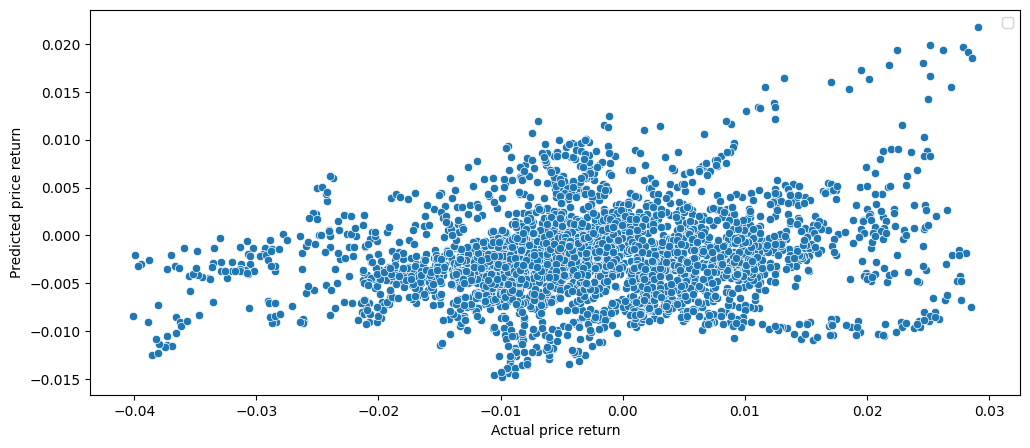

successfully saved training's output to arima_btc_scores_1_final.json


In [20]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_btc_scores_1_final.json", epochs=100)